In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
fashion = pd.read_csv('/content/fashion_products.csv')

In [3]:
fashion

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [4]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [5]:
print('Banyak data: ', len(fashion["Product ID"].unique()))
print('Jenis Pembayaran yang diterima: ', fashion["Product Name"].unique())

Banyak data:  1000
Jenis Pembayaran yang diterima:  ['Dress' 'Shoes' 'T-shirt' 'Jeans' 'Sweater']


In [6]:
print('Banyak data: ', len(fashion["User ID"].unique()))
print('Jenis Pembayaran yang diterima: ', fashion["Size"].unique())

Banyak data:  100
Jenis Pembayaran yang diterima:  ['XL' 'L' 'S' 'M']


In [7]:
print('Banyak data: ', len(fashion["Price"].unique()))
print('Jenis Pembayaran yang diterima: ', fashion["Brand"].unique())

Banyak data:  91
Jenis Pembayaran yang diterima:  ['Adidas' 'H&M' 'Zara' 'Gucci' 'Nike']


In [8]:
print('Banyak data: ', len(fashion["Rating"].unique()))
print('Jenis Pembayaran yang diterima: ', fashion["Category"].unique())
print('Jenis Pembayaran yang diterima: ', fashion["Color"].unique())

Banyak data:  1000
Jenis Pembayaran yang diterima:  ["Men's Fashion" "Women's Fashion" "Kids' Fashion"]
Jenis Pembayaran yang diterima:  ['Black' 'Yellow' 'White' 'Blue' 'Green' 'Red']


In [9]:
fashion[fashion['Product Name'] == 'Shoes']

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
14,31,15,Shoes,Zara,Men's Fashion,54,3.670412,Yellow,M
18,84,19,Shoes,Gucci,Women's Fashion,54,3.278341,White,M
27,87,28,Shoes,Zara,Women's Fashion,32,2.822803,Yellow,L
...,...,...,...,...,...,...,...,...,...
986,77,987,Shoes,H&M,Women's Fashion,42,3.249077,Red,M
990,60,991,Shoes,Nike,Kids' Fashion,25,4.972677,Red,L
992,89,993,Shoes,H&M,Women's Fashion,33,4.000542,Yellow,S
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M


In [10]:
fashion.duplicated().sum()

np.int64(0)

In [11]:
fashion.isnull().sum()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


In [12]:
# Mengubah User ID menjadi list tanpa nilai yang sama
user_ids = fashion['User ID'].unique().tolist()
print('list User ID: ', user_ids)

# Melakukan encoding User ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User ID: ', user_encoded_to_user)

list User ID:  [19, 97, 25, 57, 79, 98, 16, 63, 96, 36, 69, 87, 9, 50, 31, 37, 41, 15, 84, 56, 60, 64, 65, 26, 82, 20, 48, 18, 27, 46, 43, 91, 78, 44, 93, 74, 51, 80, 39, 33, 24, 99, 83, 38, 54, 53, 6, 3, 94, 42, 71, 72, 100, 4, 21, 85, 10, 2, 90, 12, 62, 22, 52, 35, 77, 92, 95, 7, 70, 40, 29, 23, 34, 73, 58, 88, 75, 67, 5, 13, 59, 61, 81, 55, 8, 32, 30, 76, 49, 68, 66, 89, 86, 11, 1, 17, 28, 47, 14, 45]
encoded User ID :  {19: 0, 97: 1, 25: 2, 57: 3, 79: 4, 98: 5, 16: 6, 63: 7, 96: 8, 36: 9, 69: 10, 87: 11, 9: 12, 50: 13, 31: 14, 37: 15, 41: 16, 15: 17, 84: 18, 56: 19, 60: 20, 64: 21, 65: 22, 26: 23, 82: 24, 20: 25, 48: 26, 18: 27, 27: 28, 46: 29, 43: 30, 91: 31, 78: 32, 44: 33, 93: 34, 74: 35, 51: 36, 80: 37, 39: 38, 33: 39, 24: 40, 99: 41, 83: 42, 38: 43, 54: 44, 53: 45, 6: 46, 3: 47, 94: 48, 42: 49, 71: 50, 72: 51, 100: 52, 4: 53, 21: 54, 85: 55, 10: 56, 2: 57, 90: 58, 12: 59, 62: 60, 22: 61, 52: 62, 35: 63, 77: 64, 92: 65, 95: 66, 7: 67, 70: 68, 40: 69, 29: 70, 23: 71, 34: 72, 73:

In [22]:
# Mengubah Product ID menjadi list tanpa nilai yang sama
produk_ids = fashion['Product ID'].unique().tolist()

# Melakukan proses encoding Product ID
produk_to_produk_encoded = {x: i for i, x in enumerate(produk_ids)}

# Melakukan proses encoding angka ke Produk ID
produk_encoded_to_produk = {i: x for i, x in enumerate(produk_ids)}

In [23]:
# Mapping userID ke dataframe user
fashion['Pembeli'] = fashion['User ID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe produk
fashion['Jumlah Produk'] = fashion['Product ID'].map(produk_to_produk_encoded)

In [27]:
# Mendapatkan jumlah pembeli
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah product yang dibeli oleh pelanggan
num_produk = len(produk_encoded_to_produk)
print(num_produk)

# Mengubah rating menjadi nilai float
fashion['Rating'] = fashion['Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(fashion['Rating'])

# Nilai maksimal rating
max_rating = max(fashion['Rating'])

print('Number of User: {}, Number of Produk ID: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_produk, min_rating, max_rating
))

100
1000
Number of User: 100, Number of Produk ID: 1000, Min Rating: 1.000967264175415, Max Rating: 4.987964153289795


In [16]:
fashion = fashion.sample(frac=1, random_state=42)
fashion

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size,user,resto
521,24,522,Sweater,Adidas,Men's Fashion,80,2.939080,Yellow,S,40,521
737,30,738,Jeans,H&M,Men's Fashion,100,1.033843,Blue,L,86,737
740,49,741,Shoes,Nike,Women's Fashion,81,3.386837,Blue,XL,88,740
660,30,661,Jeans,Gucci,Kids' Fashion,71,1.533612,Blue,XL,86,660
411,66,412,Shoes,Nike,Kids' Fashion,63,3.402410,Black,XL,90,411
...,...,...,...,...,...,...,...,...,...,...,...
106,19,107,Sweater,Zara,Men's Fashion,23,3.321347,Red,L,0,106
270,76,271,Jeans,Nike,Men's Fashion,45,4.075216,Blue,L,87,270
860,60,861,Shoes,Gucci,Men's Fashion,98,4.660136,White,XL,20,860
435,27,436,T-shirt,Zara,Kids' Fashion,99,2.822618,Black,XL,28,435


In [26]:
# Membuat variabel x untuk mencocokkan data User ID dan Product ID menjadi satu value
x = fashion[['Pembeli', 'Jumlah Produk']].values

# Membuat variabel y untuk membuat rating dari hasil
y = fashion['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * fashion.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 40   0]
 [ 86   1]
 [ 88   2]
 ...
 [ 20 997]
 [ 28 998]
 [  3 999]] [4.86108355e-01 8.24577907e-03 5.98412682e-01 1.33595506e-01
 6.02318696e-01 4.46863262e-02 2.18380496e-01 6.09938349e-01
 7.59187958e-01 5.81776590e-01 4.40848675e-02 3.07824638e-01
 6.94529710e-01 5.26584410e-01 9.89395478e-01 1.52289433e-01
 3.14913396e-01 4.74925635e-01 7.03133595e-01 5.38239900e-01
 4.83394016e-01 2.28819764e-01 2.11425330e-01 4.29846071e-01
 5.44986607e-01 1.79917516e-01 8.05348629e-01 5.63860439e-01
 2.98430269e-01 6.39779385e-01 2.74752063e-02 2.56251974e-01
 6.98185703e-01 1.76441637e-01 2.00980979e-02 9.98166920e-01
 9.34670029e-02 6.49792734e-01 5.48405976e-01 1.47917286e-01
 6.85995729e-01 6.92481951e-01 8.80639565e-01 5.26734027e-01
 9.83833689e-01 4.90980481e-01 5.72589783e-01 8.38199111e-01
 9.32874503e-01 4.20447217e-01 4.05882204e-01 2.34973743e-01
 8.24584066e-01 9.99494818e-01 3.75919298e-01 4.39985237e-01
 9.34858994e-01 4.01356493e-02 2.61729626e-02 6.61344054e-01
 2.19970642e-

In [28]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_produk, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_produk = num_produk
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.produk_embedding = layers.Embedding( # layer embeddings prduk
        num_produk,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.produk_bias = layers.Embedding(num_produk, 1) # layer embedding produk bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    produk_vector = self.produk_embedding(inputs[:, 1]) # memanggil layer embedding 3
    produk_bias = self.produk_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_produk = tf.tensordot(user_vector, produk_vector, 2)

    x = dot_user_produk + user_bias + produk_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [32]:
model = RecommenderNet(num_users, num_produk, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [33]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 200,
    validation_data = (x_val, y_val)
)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6974 - root_mean_squared_error: 0.2957 - val_loss: 0.6906 - val_root_mean_squared_error: 0.2780
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6945 - root_mean_squared_error: 0.2943 - val_loss: 0.6906 - val_root_mean_squared_error: 0.2780
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6912 - root_mean_squared_error: 0.2884 - val_loss: 0.6907 - val_root_mean_squared_error: 0.2781
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6922 - root_mean_squared_error: 0.2911 - val_loss: 0.6907 - val_root_mean_squared_error: 0.2781
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6925 - root_mean_squared_error: 0.2889 - val_loss: 0.6908 - val_root_mean_squared_error: 0.2782
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6915 - root_mean_squared_error: 0.2902 - val_loss: 0.6909 - val_root_mean_squared_error: 0.2783
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3

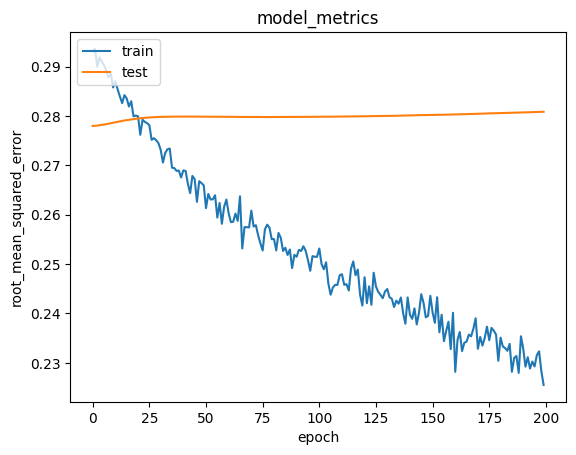

In [34]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Mengonversi data series ‘Product ID’ menjadi dalam bentuk list
product_id = fashion['Product ID'].tolist()

# Mengonversi data series ‘Brand’ menjadi dalam bentuk list
produk_brand = fashion['Brand'].tolist()

# Mengonversi data series ‘Product Name’ menjadi dalam bentuk list
produk_name = fashion['Product Name'].tolist()

print(len(product_id))
print(len(produk_brand))
print(len(produk_name))

1000
1000
1000


In [39]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
produk_new = pd.DataFrame({
    'id': product_id,
    'brand': produk_brand,
    'produk': produk_name
})
produk_new

,id,brand,produk
0,522,Adidas,Sweater
1,738,H&M,Jeans
2,741,Nike,Shoes
3,661,Gucci,Jeans
4,412,Nike,Shoes
...,...,...,...
995,107,Zara,Sweater
996,271,Nike,Jeans
997,861,Gucci,Shoes
998,436,Zara,T-shirt


In [40]:
produk_df = produk_new
df = pd.read_csv('/content/fashion_products.csv')

# Mengambil sample user
user_id = df["User ID"].sample(1).iloc[0]
buy_by_user = df[df["User ID"] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
produk_tdk_beli = produk_df[~produk_df['id'].isin(buy_by_user["Product ID"].values)]['id']
produk_tdk_beli = list(
    set(produk_tdk_beli)
    .intersection(set(produk_to_produk_encoded.keys()))
)

produk_tdk_beli = [[produk_to_produk_encoded.get(x)] for x in produk_tdk_beli]
user_encoder = user_to_user_encoded.get(user_id)
user_produk_array = np.hstack(
    ([[user_encoder]] * len(produk_tdk_beli), produk_tdk_beli)
)

In [44]:
ratings = model.predict(user_produk_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_produk_ids = [
    produk_encoded_to_produk.get(produk_tdk_beli[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('produk with high ratings from user')
print('----' * 8)

top_produk_user = (
    buy_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    ["Product ID"].values
)

produk_df_rows = produk_df[produk_df['id'].isin(top_produk_user)]
for row in produk_df_rows.itertuples():
    print(row.produk, ':', row.brand)

print('----' * 8)
print('Top 10 produk recommendation')
print('----' * 8)

recommended_produk = produk_df[produk_df['id'].isin(recommended_produk_ids)]
for row in recommended_produk.itertuples():
    print(row.produk, ':', row.brand)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Showing recommendations for users: 69
produk with high ratings from user
--------------------------------
Shoes : Gucci
Shoes : Nike
T-shirt : H&M
Sweater : Zara
Jeans : H&M
--------------------------------
Top 10 produk recommendation
--------------------------------
Jeans : Adidas
Sweater : Zara
Dress : H&M
T-shirt : Gucci
T-shirt : Gucci
T-shirt : Gucci
T-shirt : H&M
Dress : Nike
Sweater : Nike
Sweater : Adidas
